<a href="https://colab.research.google.com/github/ahathaway821/COVID-19-Fact-Checking/blob/master/fact_check_claim_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ahathaway821/COVID-19-Fact-Checking.git

Cloning into 'COVID-19-Fact-Checking'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 5), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
import pandas as pd
import os
import re
from wordcloud import WordCloud

In [4]:
claims = pd.read_csv('/content/COVID-19-Fact-Checking/data/poynterDataScraped27May2020.csv')
claims.head()

,When did you see the claim?,Country 1,Country 2,Country 3,Country 4,Countries,Organization,What did you fact-check?,Who said/posted it?,URL to fact-checked article (in your language),Final rating,Explanation
0,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,"Brazilian states receive a R$ 16,450 extra fu...",Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"According to the Ministry of Health, this ext..."
1,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,COVID-19 is a bacteria causing death due to t...,Facebook/WhatsApp,https://english.factcrescendo.com/2020/05/26/f...,FALSE,COVID-19 is a virus and the theory is baseles...
2,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,A video shows a group of police officers salu...,Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"The video is real, but they were not saluting..."
3,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,Video shows a doctor claiming that If you can...,Facebook/Twitter,https://marathi.factcrescendo.com/no-holding-y...,FALSE,""" Medical Experts have clarified that being ab..."
4,2020/05/25,Spain,United States,NaN,NaN,"Spain, United States",Maldita.es,A poem signed by K. O’Meara beginning with th...,Social media,https://maldita.es/malditobulo/2020/05/25/poem...,FALSE,"It is a hoax. The title of the poem is ""In th..."


In [0]:
def preprocess_columns(df, column_name):
  processed_column_name = column_name + '_processed'
  # Remove punctuation
  df[processed_column_name] = df[column_name].map(lambda x: re.sub('[,\.!?]', '', x))

  # Convert the titles to lowercase
  df[processed_column_name] = df[processed_column_name].map(lambda x: x.lower())

  # Remove overly common covid terms
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('coronavirus', '', x)) 
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('covid', '', x))
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('19', '', x))

  

In [0]:
preprocess_columns(claims, 'What did you fact-check?')
preprocess_columns(claims, 'Explanation')

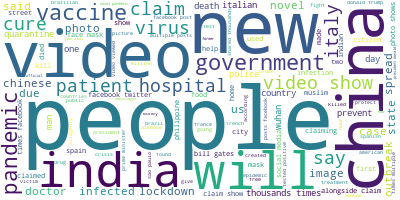

In [7]:
#def create_word_cloud(df, column_name):
df = claims
column_name = 'What did you fact-check?' + '_processed'
fact_checked_claim_processed = 'What did you fact-check?' + '_processed'
# Join the different processed titles together.
long_string = ','.join(list(df[column_name].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

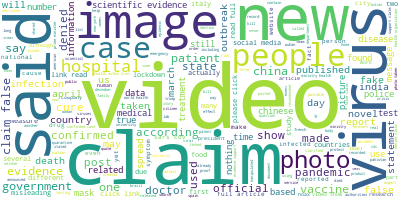

In [8]:
#def create_word_cloud(df, column_name):
df = claims
column_name = 'Explanation' + '_processed'

# Join the different processed titles together.
long_string = ','.join(list(df[column_name].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


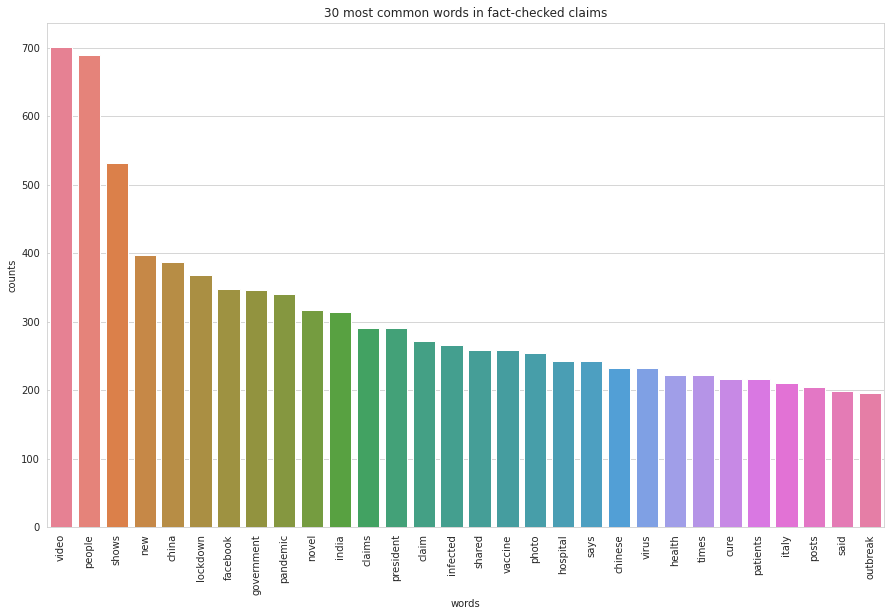

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_most_common_words(count_data, count_vectorizer, n=10):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=f'{n} most common words in fact-checked claims')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(claims[fact_checked_claim_processed])
# Visualise the 10 most common words
plot_most_common_words(count_data, count_vectorizer, 30)

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 15
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
india outbreak video lockdown gates

Topic #1:
people video china infected police

Topic #2:
water shows prevent drinking photo

Topic #3:
cure video new tea health

Topic #4:
chinese virus created people flu

Topic #5:
shows hospital cures video wuhan

Topic #6:
use masks hospital people police

Topic #7:
people masks claims face kill

Topic #8:
china says post claims video

Topic #9:
lockdown president trump government donald

Topic #10:
state president pandemic duterte rodrigo

Topic #11:
vaccine health minister ministry developed

Topic #12:
facebook claim shared times posts

Topic #13:
video spread man arrested government

Topic #14:
infected positive tested news says


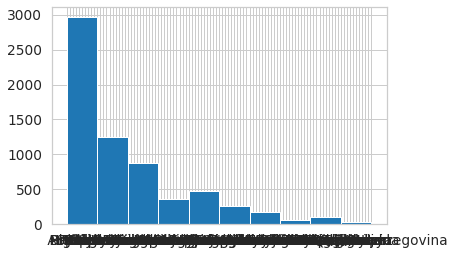

In [11]:
import matplotlib.pyplot as plt

plt.hist(claims['Country 1'])
plt.show()

In [14]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 50.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=ebecbe3721b4d586247085e2f5d638089901e0a5a2293f868b1246a6d9c07c8e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=08235874ce7819c641bc953bde0c5e8c8fa2fd5af12ef81ad26ccbd0c088fbcd
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [18]:
!pip install graphlab

ERROR: Could not find a version that satisfies the requirement graphlab (from versions: none)
ERROR: No matching distribution found for graphlab


In [0]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pyLDAvis.enable_notebook()

In [0]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

In [20]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(claims[fact_checked_claim_processed])
print(dtm_tf.shape)

(6577, 1065)


In [23]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(claims[fact_checked_claim_processed])
print(dtm_tfidf.shape)

(6577, 1065)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [32]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [33]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.139628 -0.099289       1        1  13.100722
0      0.218585 -0.015134       2        1  11.467901
1      0.201691 -0.142324       3        1  10.698492
2     -0.028702 -0.040364       4        1  10.183734
8     -0.289186 -0.198060       5        1   9.965036
3     -0.029101  0.152954       6        1   9.841708
5     -0.161869  0.078093       7        1   9.661620
6      0.122659  0.074796       8        1   8.830032
4     -0.044883  0.235284       9        1   8.316330
7     -0.128822 -0.045956      10        1   7.934424, topic_info=            Term        Freq       Total Category  logprob  loglift
321     facebook  343.000000  343.000000  Default  30.0000  30.0000
1008     vaccine  258.000000  258.000000  Default  29.0000  29.0000
162        claim  268.000000  268.000000  Default  28.0000  28.0000
1014       video  682.000000  682.000000  Default  27.0000  27.0000
719    president  285.000000  285.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
399         help   29.660390   87.634764  Topic10  -4.6495   1.4506
710         post   35.650760  164.777551  Topic10  -4.4655   1.0031
834         says   38.553940  236.472820  Topic10  -4.3872   0.7202
58         audio   22.974495   49.370169  Topic10  -4.9049   1.7690
382   government   24.384544  340.082004  Topic10  -4.8454  -0.1013

[585 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         8  0.973790     actor
11       10  0.931595   advises
12        1  0.937359  advisory
14        6  0.058076    africa
14        7  0.116152    africa
...     ...       ...       ...
1061      4  0.155043     years
1061      7  0.792444     years
1061      9  0.034454     years
1064      1  0.902956   youtube
1064      8  0.067722   youtube

[1114 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 2, 3, 9, 4, 6, 7, 5, 8])